In [4]:
# Import statements 
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
import geopandas as gpd
import geodatasets as gds
import folium
import pymagicc as pm
import matplotlib.pyplot as plt
import scmdata
from scmdata import run_append
from tqdm import tqdm 
from scmdata import ScmRun
from pymagicc.io import MAGICCData
from pymagicc.scenarios import rcp26, rcp45, rcp60, rcp85
rcp26['scenario'][0]

'RCP26'

In [3]:
# get rcp data
r = [rcp26, rcp45, rcp60, rcp85]
rcps = [pm.run(r[i]) for i in range(len(r))]

/home/ty_743/anaconda3/envs/climate_app/lib/python3.9/site-packages/scmdata/run.py:905: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  df.columns = pd.Index(columns, name="time")
/home/ty_743/anaconda3/envs/climate_app/lib/python3.9/site-packages/scmdata/run.py:905: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  df.columns = pd.Index(columns, name="time")
/home/ty_743/anaconda3/envs/climate_app/lib/python3.9/site-packages/scmdata/run.py:905: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result 

Text(0.5, 1.0, 'Fossile Fuel and Industrial CO2 Emissions Over Time')

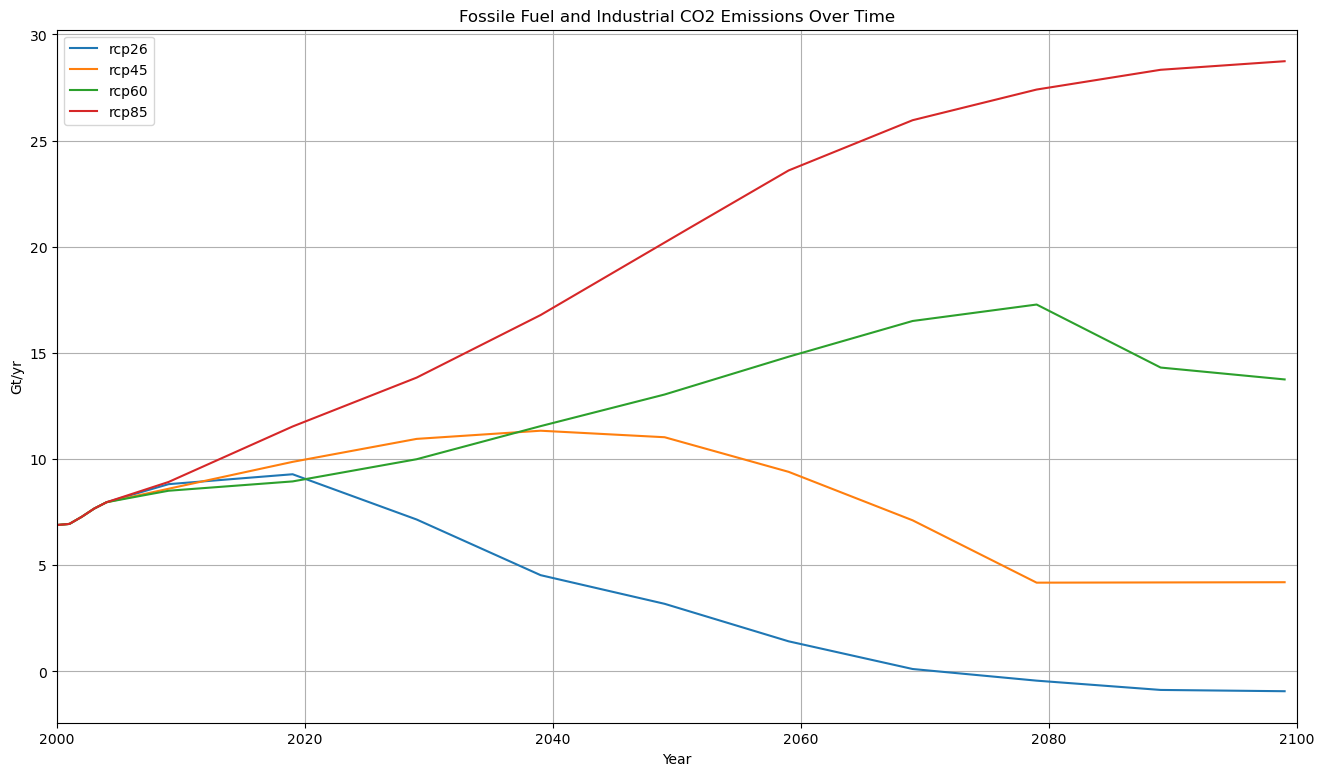

In [4]:
# get important data for plotting
var = "Emissions|CO2|MAGICC Fossil and Industrial"
sTemp = "Surface Temperature"
labels = ["rcp26","rcp45","rcp60","rcp85"]

# first get the CO2 data
rcp_co2 = np.stack(
    [np.squeeze(rcps[i].filter(variable = var, region='World').timeseries().values) for i in range(len(r))]
    )

# then get the Surface Temperature data
rcp_sT = np.stack(
    [np.squeeze(rcps[i].filter(variable = sTemp, region='World').timeseries().values) for i in range(len(r))]
    )
years = np.arange(1764, 2100)
plt.figure(figsize=(16,9))
for i in range(len(rcp_co2)):
    plt.plot(years, rcp_co2[i], label = labels[i])
plt.legend()
plt.grid()
plt.xlim(2000, 2100)
plt.xlabel("Year")
plt.ylabel("Gt/yr")
plt.title("Fossile Fuel and Industrial CO2 Emissions Over Time")

In [1]:
rcp26['scenario']

NameError: name 'rcp26' is not defined

Text(0.5, 1.0, 'Surface Temperature Anomaly for Modified Scenario')

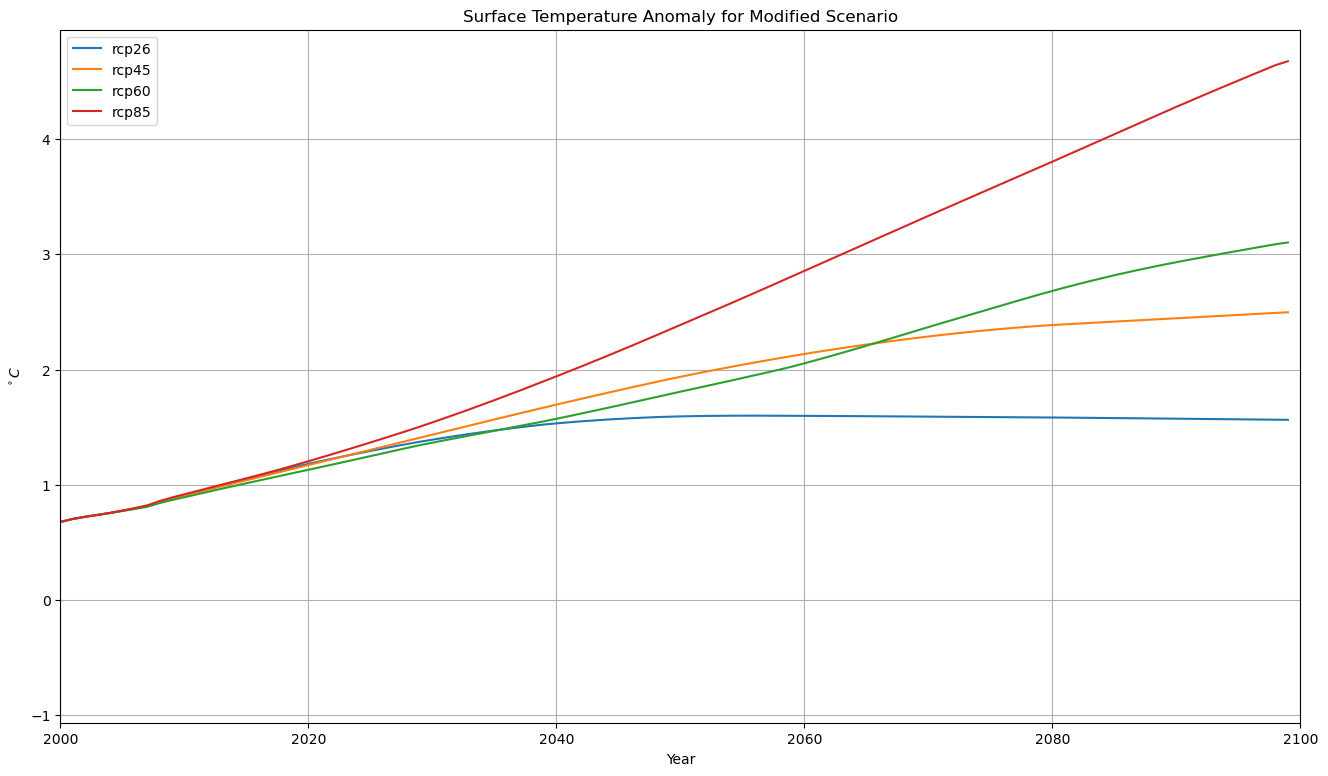

In [8]:
plt.figure(figsize=(16,9))
for i in range(len(rcp_sT)):
    plt.plot(years, rcp_sT[i], label = labels[i])
plt.legend()
plt.grid()
plt.xlim(2000, 2100)
plt.xlabel("Year")
plt.ylabel(r"$^\circ C$")
plt.title("Surface Temperature Anomaly for Modified Scenario")

In [ ]:
# save the data
# np.save("rcp_data/Fossil_Fuel_CO2_Emissions_For_RCP_Scenarios.npy", rcp_co2)
# np.save("rcp_data/Surface_Temperaure_Anomalies_For_RCP_Scenarios.npy", rcp_sT)